In [8]:
# import tools 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [9]:
# import data 
df = pd.read_csv('Mall_Customers.csv') 
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# amati bentuk data 
df.shape 

(200, 5)

In [11]:
# Melihat ringkasan statistik deskriptif dari DataFrame  
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# cek null data 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# cek outlier 
df.boxplot()

<Axes: >

C:\Users\surya\AppData\Local\Temp\ipykernel_19248\1716778882.py:3: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1 , figsize = (15 , 6))


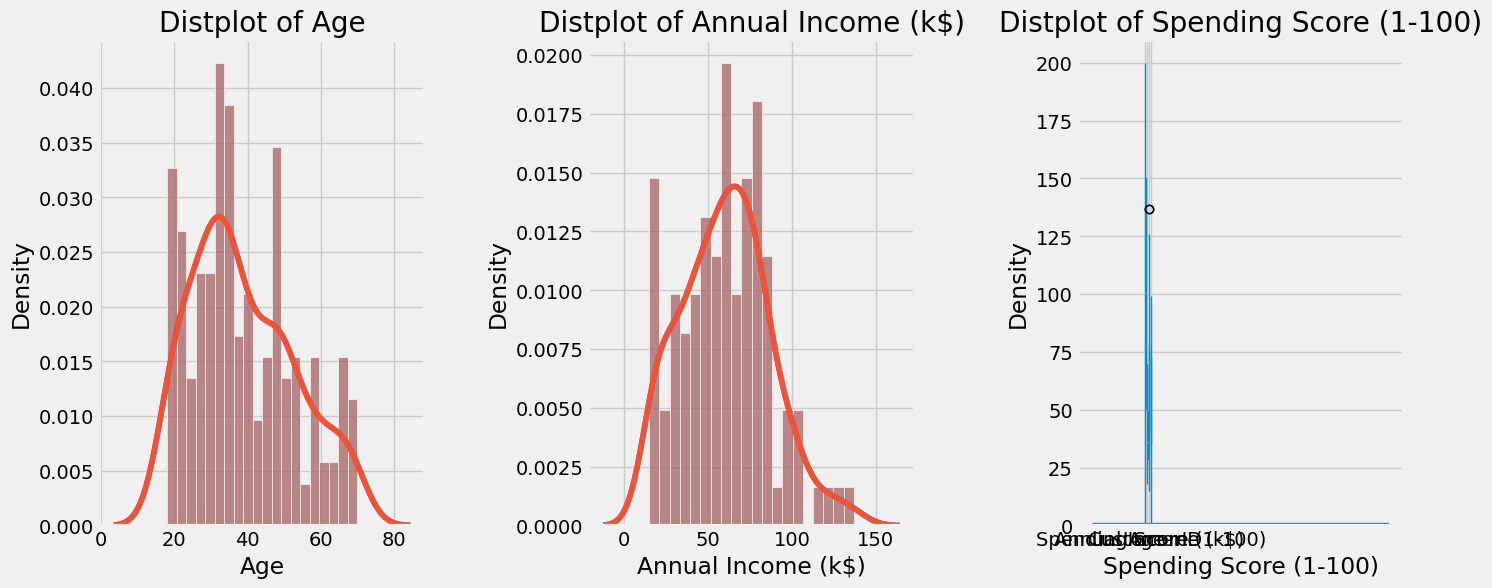

In [14]:
# amati bentuk visual masing-masing fitur 
plt.style.use('fivethirtyeight') 
plt.figure(1 , figsize = (15 , 6)) 
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']: 
  n += 1 
  plt.subplot(1 , 3 , n) 
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5) 
  sns.histplot( 
    df[x], kde=True, 
    stat="density", kde_kws=dict(cut=3), bins = 20) 
  plt.title('Distplot of {}'.format(x)) 
plt.show()

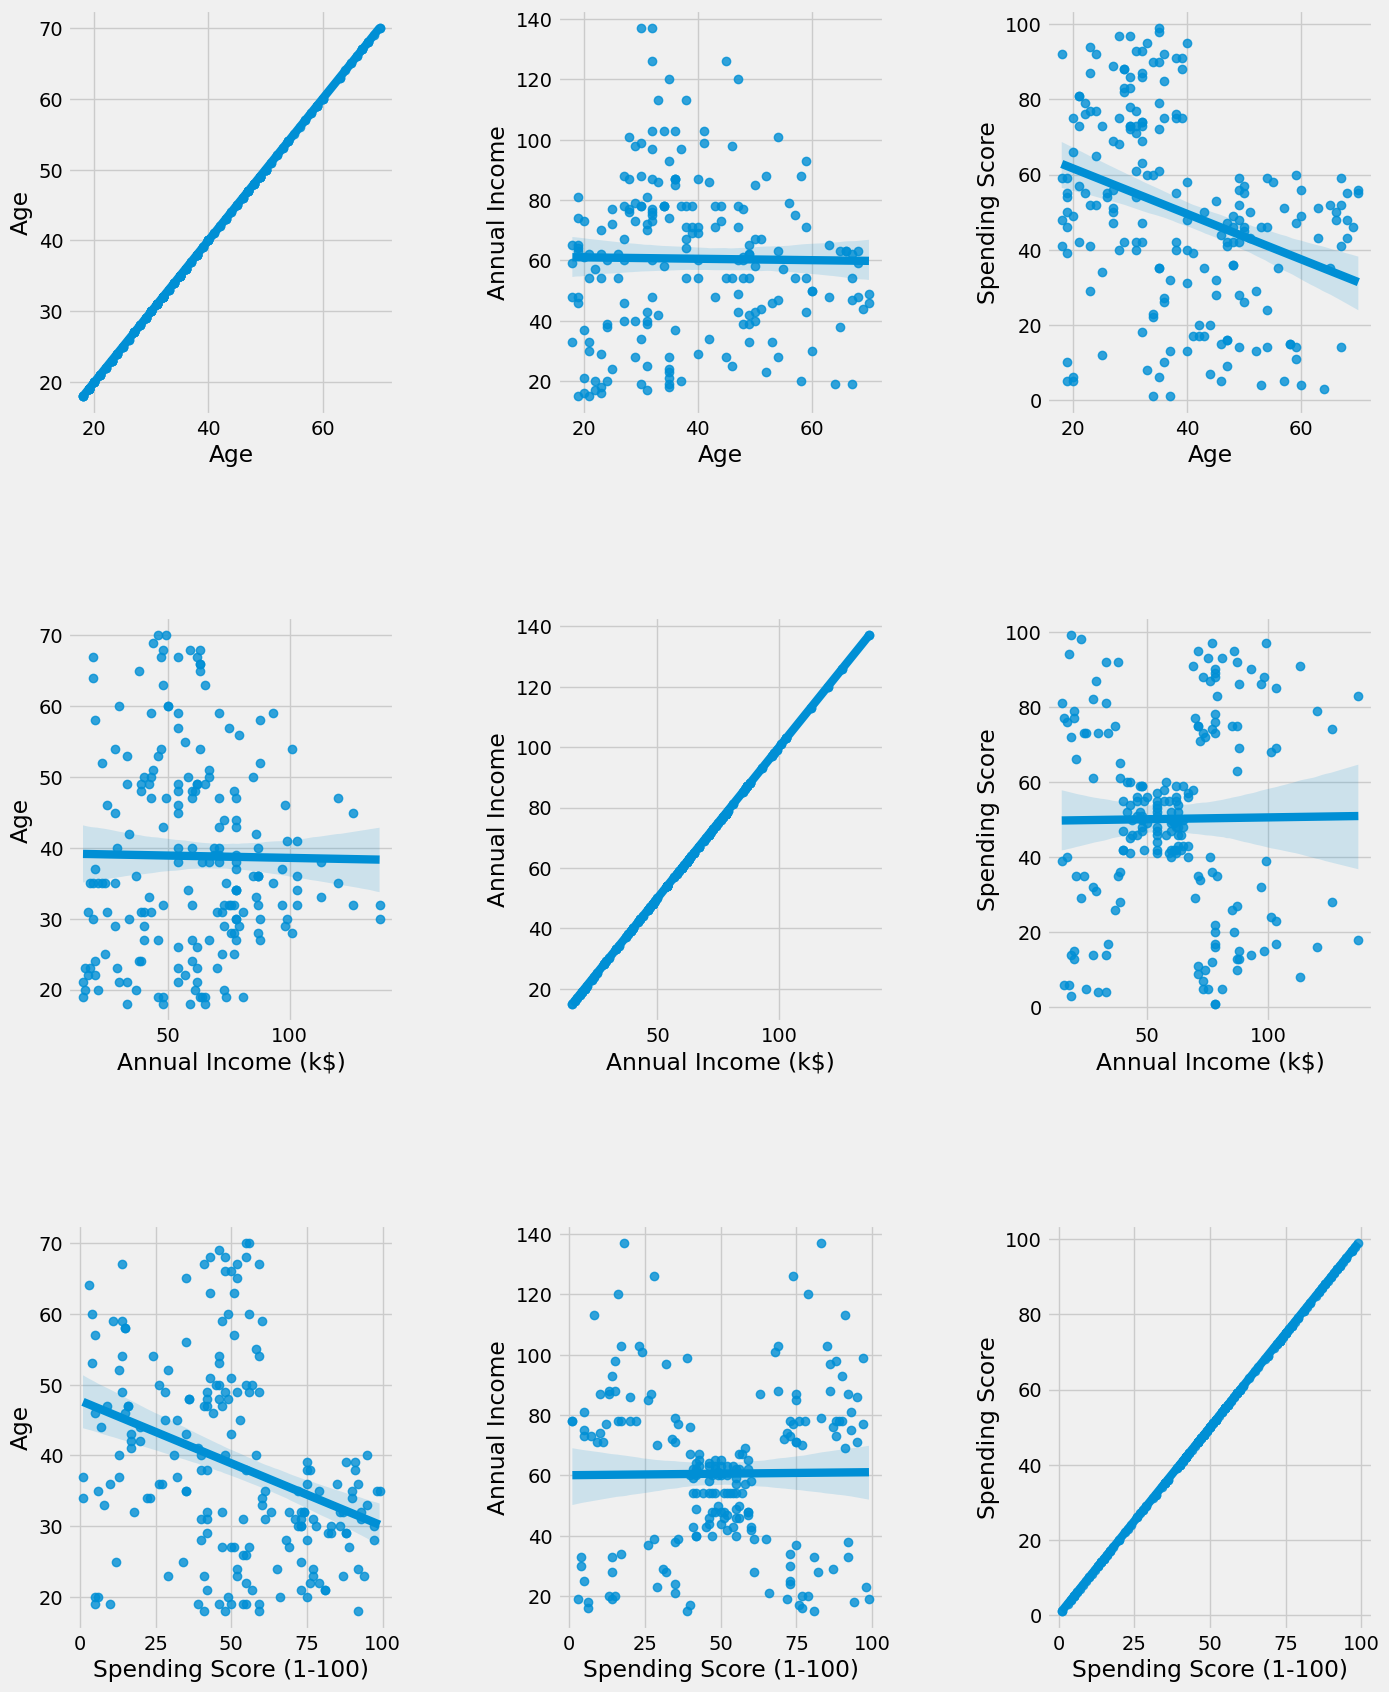

In [15]:
# Ploting untuk mencari relasi antara Age , Annual Income and Spending Score 
plt.figure(1 , figsize = (15 , 20)) 
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']: 
  for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']: 
    n += 1 
    plt.subplot(3 , 3 , n) 
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5) 
    sns.regplot(x = x , y = y , data = df) 
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y ) 
plt.show()

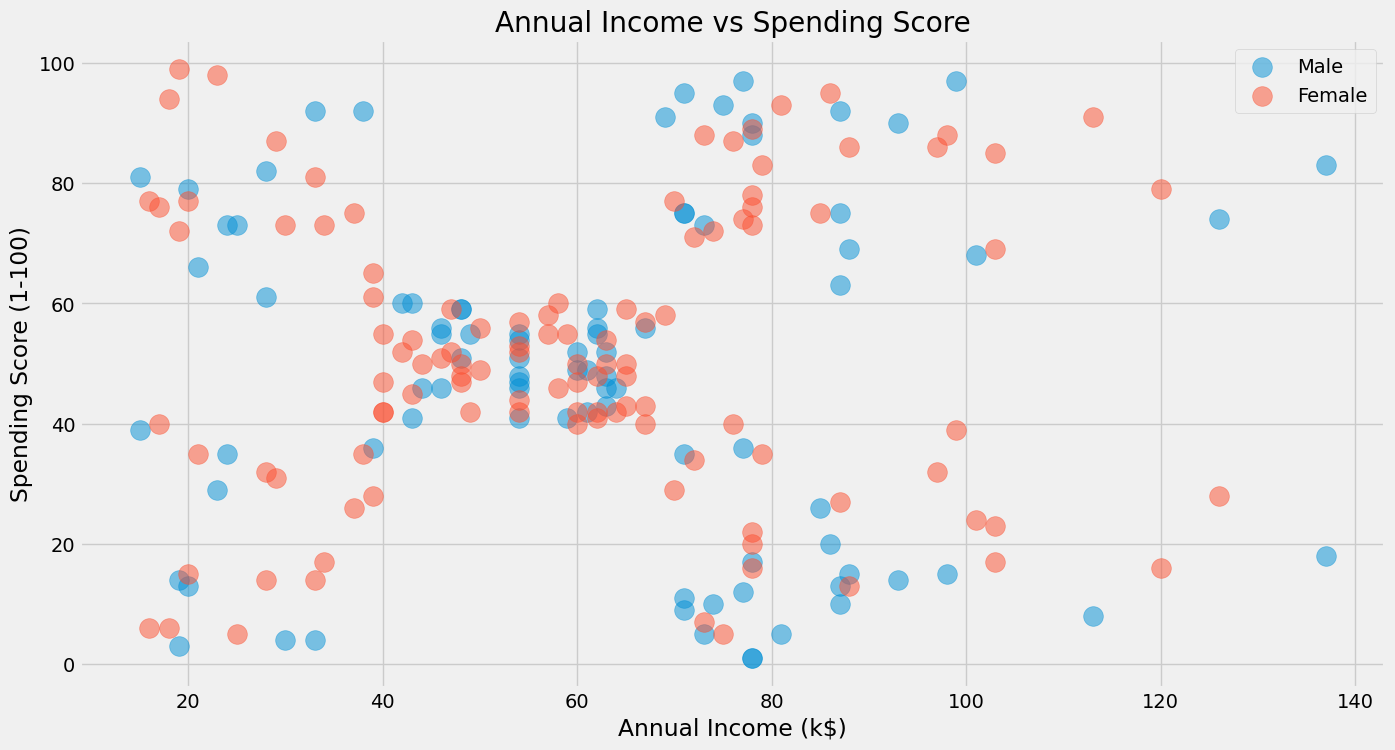

In [16]:
# Melihat sebaran Spending Score dan Annual Income pada Gender 
plt.figure(1 , figsize = (15 , 8)) 
for gender in ['Male' , 'Female']: 
  plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , 
  data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , 
  label = gender) 
  plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
  plt.title('Annual Income vs Spending Score') 
  plt.legend() 
plt.show()

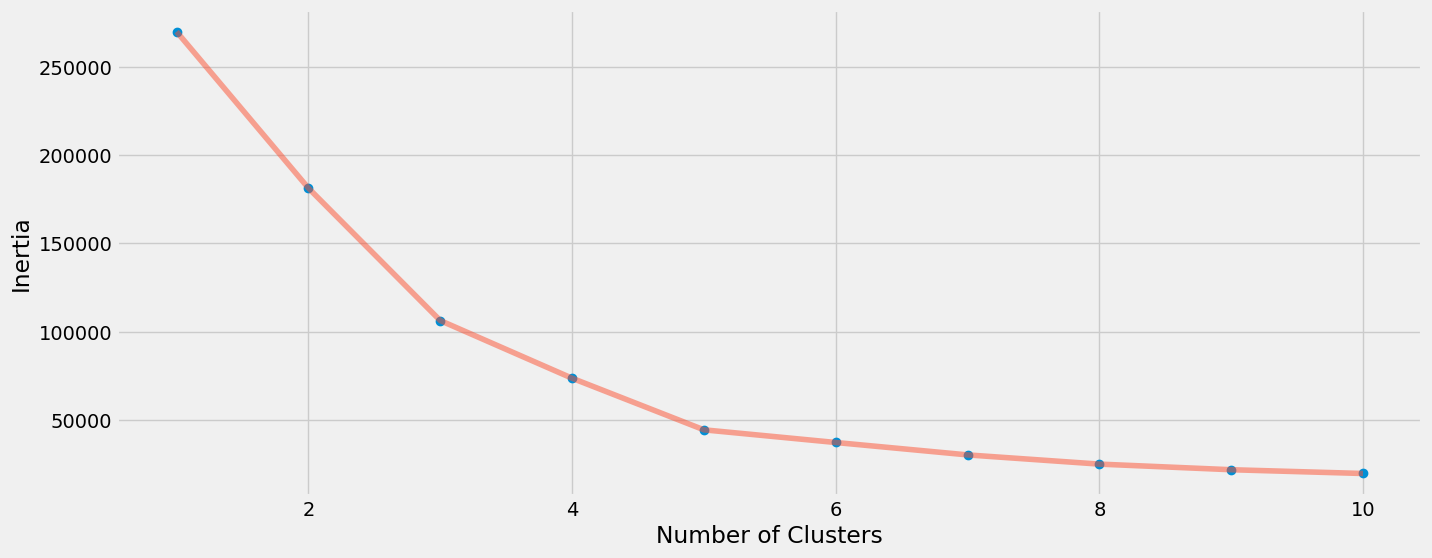

In [17]:
# Merancang K-Means untuk spending score vs annual income 
# Menentukan nilai k yang sesuai dengan Elbow-Method 
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values 
inertia = [] 
for n in range(1 , 11): 
  algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 
10,max_iter=300, random_state= 111) ) 
  algorithm.fit(X1) 
  inertia.append(algorithm.inertia_) 
 
# Plot bentuk visual elbow 
plt.figure(1 , figsize = (15 ,6)) 
plt.plot(range(1 , 11) , inertia , 'o') 
plt.plot(range(1 , 11) , inertia , '-' , alpha = 0.5) 
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia') 
plt.show()

In [18]:
# Membangun K-Means 
algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 111 , algorithm='elkan') ) 
algorithm.fit(X1) 
labels2 = algorithm.labels_ 
centroids2 = algorithm.cluster_centers_

In [19]:
# Menyiapkan data untuk bentuk visual cluster 
labels2 = algorithm.labels_ 
centroids2 = algorithm.cluster_centers_ 
step = 0.02 
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1 
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
np.arange(y_min, y_max, step)) 
Z1 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) # array diratakan 1D

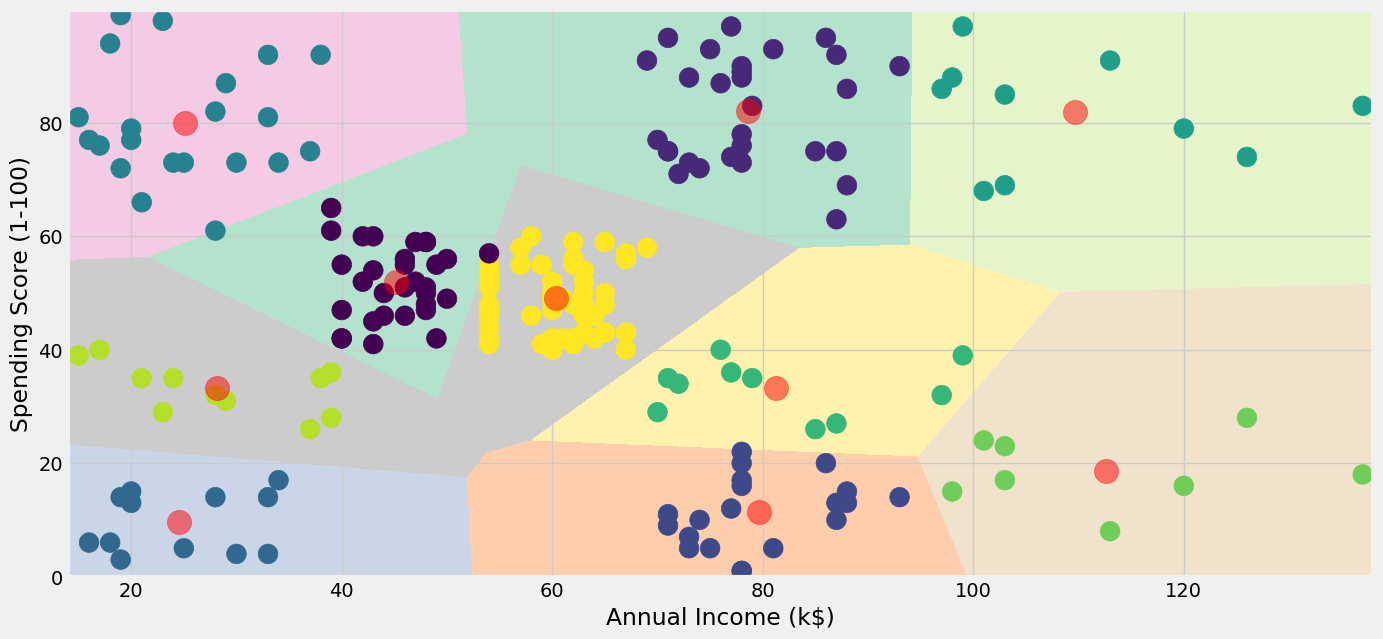

In [20]:
# Melihat bentuk visual cluster 
 
plt.figure(1 , figsize = (15 , 7) ) 
plt.clf() 
Z1 = Z1.reshape(xx.shape) 
plt.imshow(Z1 , interpolation='nearest', 
extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower') 
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data= df , c = labels2 , s = 200 ) 
plt.scatter(x = centroids2[: , 0] , y = centroids2[: , 1] , s = 
300 , c = 'red' , alpha = 0.5) 
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)') 
plt.show()

In [21]:
# Melihat nilai Silhouette Score 
score2 = silhouette_score(X1, labels2) 
print("Silhouette Score: ", score2)

Silhouette Score:  0.45842235992027575
